# Titanic survival prediction using Logistic Regression

## Introduction

Linear and Logistic Regression are the most basic form of regression which are commonly used. The only difference between these two regression is that the output feature is continuos in case of linear regression and linear and binary in case of Logistic regression.


For this titanic dataset, our goal is to predict the survival rate of the passengers, so it should be in binary form(survived or not survived). Apparently, we will use Logistic Regression for training the model over this dataset.

## Steps

## (1) Import data and Python modules

In [1]:
# python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# white grid background for seaborn plot
sns.set(style='whitegrid', color_codes=True)
%matplotlib inline
import matplotlib.pyplot as plt 



In [2]:
# reading the datasets from csv file
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Train data contains 891 values as a features

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Let, count the null values in both the test and train test cases


In [7]:
train_df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null bool
Survived       891 non-null bool
Pclass         891 non-null bool
Name           891 non-null bool
Sex            891 non-null bool
Age            891 non-null bool
SibSp          891 non-null bool
Parch          891 non-null bool
Ticket         891 non-null bool
Fare           891 non-null bool
Cabin          891 non-null bool
Embarked       891 non-null bool
dtypes: bool(12)
memory usage: 10.5 KB


In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The train datasets contains many null values in 'Age', 'Cabin' and 'Embarked' features.

In [9]:
## Let examine the test datasets
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# Let compare the feature of the train and test datasets
train_columns = (train_df.columns.values)
test_columns = test_df.columns.values

In [11]:
missing_columns = [column for column in train_columns if column not in test_columns]
missing_columns

['Survived']

The 'Survived' feature is missing in the test data. So  the goal is to predict the Survived factor based on titanic data.

## Goal

To predict the Survived ratio from the available data in Titanic datasets.

## (2) Data Analysis and Missing value assesment

In [12]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The 'Age', 'Embarked' and 'Cabin' contains null values in the datasets. Let analyze them one by one and replace accordingly.

In [13]:
#percentage of missing data
percent1 = (train_df.isnull().sum()/len(train_df)) * 100

In [14]:
total = train_df.isnull().sum().sort_values(ascending=False)

In [15]:
total.head()

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64

In [16]:
missing_data = pd.concat([total,percent1],axis=1,keys=['Total','NULL'])

In [17]:
missing_data.head()

,Total,NULL
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467
Fare,0,0.000000
Name,0,0.000000


## AGE feature

In [18]:
# 'AGE' mean and median of the feature.
print('Mean:-- ', train_df["Age"].mean())
print('Median:- ',train_df["Age"].median())

Mean:--  29.6991176471
Median:-  28.0


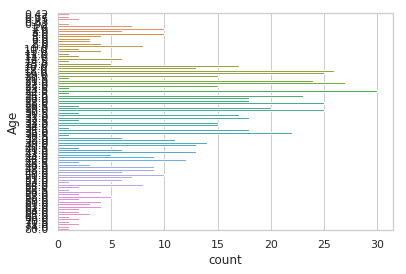

In [19]:
sns.countplot(y='Age',data=train_df)
plt.show()

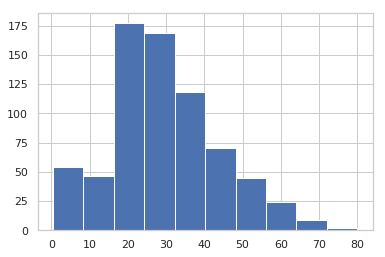

In [20]:
train_df['Age'].hist()

As we can see that the average and median value of the all the 'Age' features are the same. As a result, we will replace the NULL values with its median values i.e 29.

### Cabin missing values


In [21]:
train_df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [22]:
train_df['Cabin'].isnull().sum()

687

The 'Cabin' feature contains 687 NULL values. SO, we will ignore this feature.

In [23]:
train_df['Cabin'].value_counts().head()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
Name: Cabin, dtype: int64

### Embarked missing values

In [24]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

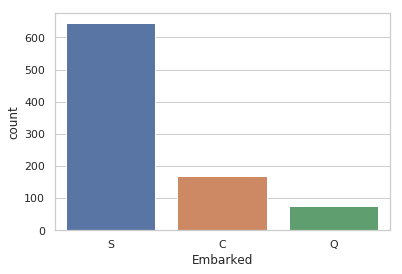

In [25]:
sns.countplot(x='Embarked',data=train_df)

In [26]:
# The common values in Embarked is 'S' from the above figure.
train_df['Embarked'].value_counts().idxmax()


'S'

From the countplot figure, we observed that the 'S' value is common in the 'Embarked' feature.So, we will replace the NULL values with the 'S' value.

## Final replacement for NULL values

We will replace the data for both :- train and test datasets.

(1) If 'Age' is missing, we will fill out with mean values.

(2) If 'Cabin' is missing, we will ignore it.

(3) If 'Embarked' value is missing', we will replace with 'S' values.


In [27]:
# AGE
train_data = train_df.copy()
test_data = test_df.copy()

In [28]:
train_data['Age'].fillna(train_df['Age'].median(),inplace=True)
test_data['Age'].fillna(test_df['Age'].median(),inplace=True)

In [29]:
# Embarked
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(),inplace=True)
test_data['Embarked'].fillna(test_df['Embarked'].value_counts().idxmax(),inplace=True)

In [30]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [31]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

There are no null values in the train datasets.

In [32]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

As expected, there are no null values in the test datasets.

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [34]:
# Additional variables
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
train_data['Parch'].head()

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

From the Datasets, it mentioned that the feature' Parsh' and 'SibSp' are importants enough to predict the behaviour of the survivors. So, we will replace '1' for travel alone and '0' for travelwithfamily.

For completing the above task, we will add the additional feature in the datasets:- 'TravelAlone'

In [36]:
train_data['SibSp'].head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [37]:
(train_data['SibSp'] + train_data['Parch'] ).head()

0    1
1    1
2    0
3    1
4    0
dtype: int64

In [38]:
train_data['TravelAlone'] = np.where((train_data['SibSp'] + train_data['Parch'])>0,0,1)

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


Drop the SibSp and Parsh features

In [40]:
train_data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


## Check for categorical variables.

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
TravelAlone    891 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Let create the categorical variables for Pclass, Sex, and Embarked.

In [43]:
training = pd.get_dummies(train_data,columns=['Pclass', 'Sex', 'Embarked'])

In [44]:
training.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,1,0,0,1


In [45]:
# to avoid the dummy trap, remove the one variables from each
training.drop(['PassengerId', 'Sex_female'], inplace=True,axis=1)

In [46]:
training.head()
final_train = training
final_train.head()

,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,0,1
4,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,1,0,0,1


## Drop the Unwanted features

From the above value, the TIcket and Name doesnot impact the ouput feature. So, we will drop both the features.

In [47]:
final_train.drop(['Name','Ticket'],axis=1,inplace=True)

In [48]:
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1


##  Exploratory Data Analysis



In [49]:
# AGE
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1


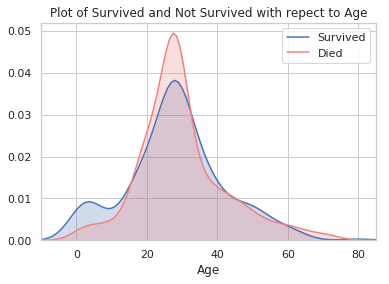

In [50]:
ax = sns.kdeplot(final_train['Age'][final_train.Survived == 1],shade=True)
sns.kdeplot(final_train['Age'][final_train.Survived == 0],shade=True, color='lightcoral')
plt.xlim(-10,85)
plt.title('Plot of Survived and Not Survived with repect to Age')
plt.xlabel('Age')
plt.legend(['Survived','Died'])

The age distribution of the Survivors and Died person is very similiar. But, from the above figure, we can noticed that the out of survivors, a major proportion were children. The passengers made an attempt to save children first towards to the life boats.

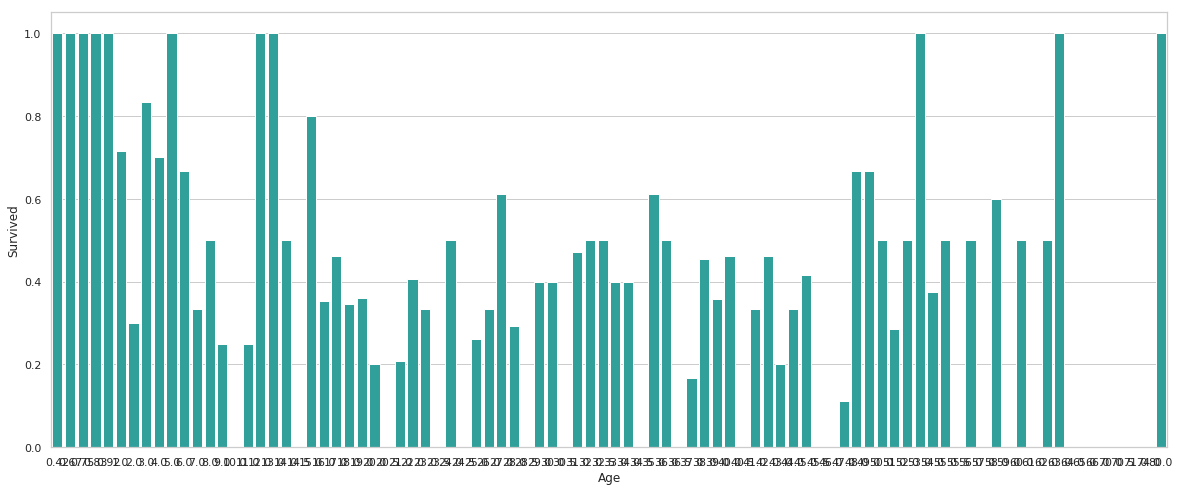

In [51]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

## Fare feature exploration

Text(0.5,1,'Plot of Survived and Dead for Fare feature')

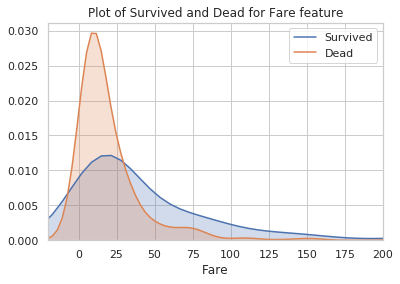

In [52]:
ax = sns.kdeplot(final_train['Fare'][final_train.Survived == 1], shade=True)
sns.kdeplot(final_train['Fare'][final_train.Survived == 0], shade=True)
plt.xlim(-20,200)
plt.legend(['Survived','Dead'])
plt.xlabel('Fare')
plt.title('Plot of Survived and Dead for Fare feature')


THe distributions for the Survived and Dead class are totally different. Furthermore, we can see that the people who paid lower dare appear to have less likely to survive. THis will related to the Passenger Class to which they belonged to.

## Passenger feature exploration

In [53]:
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1


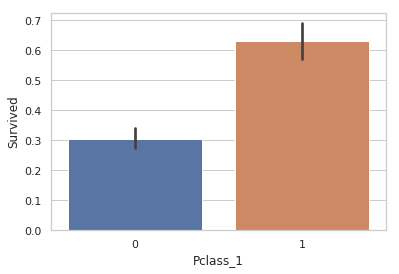

In [54]:
sns.barplot('Pclass_1', 'Survived',data=final_train)

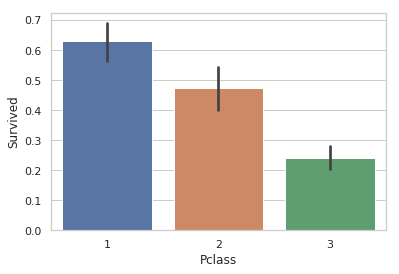

In [55]:
# For all the 3 Pclass
sns.barplot('Pclass', 'Survived',data=train_df)

As expected, the passengers belonging to class1 survived as compared to others.

## GENDER feature exploration

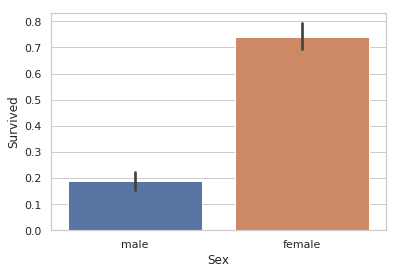

In [56]:
sns.barplot('Sex', 'Survived',data=train_df)

Female passengers are more in survived passengers than male passengers.


## Embarked feature exploration


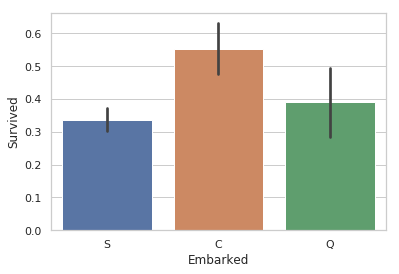

In [57]:
sns.barplot('Embarked', 'Survived',data=train_df)

It is clear from the above figure that passengers who boarded in Cherbourg, France appear to have highest survival rate. because of the cost of Fare was high in France probably.

## TravelALone feature exploration

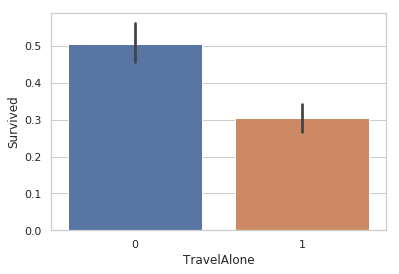

In [58]:
sns.barplot('TravelAlone', 'Survived',data=final_train)

Individual travelling without family were more likely to die in disaster than those with family aboared. From the fact, probably, the individual travelling alone were likely male, who booked low fares for low Passenger class.

# Logistic Regression

In [59]:
len(final_train.columns.values),(final_train.columns.values)

(11, array(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
        'Pclass_3', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object))

In [60]:
# Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [61]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X = final_train[cols]
Y = final_train['Survived']
model = LogisticRegression()
rfe = RFE(model,6)
rfe = rfe.fit(X,Y)
expected = X.columns[rfe.support_]

In [62]:
expected

Index(['TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S',
       'Sex_male'],
      dtype='object')

## Optimal features

In [63]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression())
rfecv.fit(X,Y)
rfecv.n_features_
X.columns[rfecv.n_features_]

'Pclass_1'

In [64]:
expected

Index(['TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S',
       'Sex_male'],
      dtype='object')

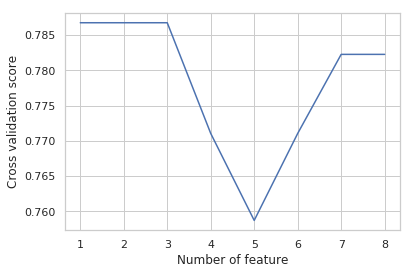

In [65]:
plt.xlabel("Number of feature")
plt.ylabel('Cross validation score')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

## Split the datasets

In [66]:
from sklearn.model_selection import train_test_split
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1


In [67]:
X = final_train[expected]

In [68]:
Y  = final_train['Survived']

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=2)

In [70]:
logred = LogisticRegression()
logred.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
predictions = logred.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))


             precision    recall  f1-score   support

          0       0.77      0.87      0.82       160
          1       0.76      0.62      0.68       108

avg / total       0.77      0.77      0.76       268



In [72]:
final_train['PassengerId']=test_df['PassengerId']

## Model Evaluation


In [73]:
# using cross_val_score()
logreg =LogisticRegression()
from sklearn.model_selection import cross_val_score
acc = cross_val_score(logreg,X,Y,cv=10,scoring='accuracy')

In [74]:
roc_Auc= cross_val_score(logreg,X,Y,cv=10,scoring='roc_auc')

In [75]:
negative_loss = cross_val_score(logreg,X,Y,cv=10,scoring='neg_log_loss')

In [76]:
print('Accuracy:-- ', acc.mean())
print('ROC AUC:-- ', roc_Auc.mean())
print('Negative loss:-- ', negative_loss.mean())

Accuracy:--  0.780019010328
ROC AUC:--  0.841756939139
Negative loss:--  -0.466036313746


## FINISH